# 카드소비 패턴 분석 시각화 경진대회

데이콘 베이직 서머 시각화 대회는 카드 소비 데이터를 이용하여  
소비 트렌드 및 소비 패턴을 효과적으로 분석 시각화를 하는 대회입니다.  
시각화 대회인 만큼 탐색적 자료 분석(EDA, Exporatory Data Analysis) 을 진행하여  
데이터에서 인사이트를 발굴해 보도록 하겠습니다.

## Preview

 ### 저는 저만의 소제목 "어떤 혜택을 가진 카드를 만들어야 할까?" 라는 주제로 EDA를 진행하고자 합니다

주어진 데이터셋은 4가지의 데이터와 1가지의 서울시민업종을 포함한 마스터테이블로 구성되어 있습니다.  
따라서 필요에 따라 카드소비 업종코드를 필요한 데이터와 조인하여 활용하는 방식으로 진행되었습니다.  
또한 결측치들은 데이터의 흐름에 영향을 주기때문에 시각화를 통하여 제거 후 EDA를 진행하겠습니다.  
  
주어진 데이터는 아래와 같습니다.

block_age= 블록별 성별연령대별 카드소비패턴  
block_hour= 블록별 시간대별소액결제건수 카드소비패턴  
state_region= 집계구별 일별소비지역별 카드소비패턴  
state_time= 집계구별 일별시간대별 카드소비패턴  
code= 카드소비 업종코드
  
또한 모든 컬럼명을 영어로 바꿔 프로젝트를 진행하였습니다. 

In [29]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

In [30]:
block_age=pd.read_csv('/Users/dowoosung/Desktop/Card/블록별 성별연령대별 카드소비패턴.csv',encoding='cp949')
block_hour=pd.read_csv('/Users/dowoosung/Desktop/Card/블록별 시간대별소액결제건수 카드소비패턴.csv',encoding='cp949')
state_hour=pd.read_csv('/Users/dowoosung/Desktop/Card/집계구별 일별시간대별 카드소비패턴.csv',encoding='cp949')
state_region=pd.read_csv('/Users/dowoosung/Desktop/Card/집계구별 일별소비지역별 카드소비패턴.csv',encoding='cp949')
code=pd.read_csv('/Users/dowoosung/Desktop/Card/카드소비 업종코드.csv',encoding='cp949')

In [43]:
block_age.rename(columns={'서울시민업종코드(UPJONG_CD)' : 'upjong_cd', '기준년월(YM)' : 'ym' , 
                         '고객주소블록코드(BLOCK_CD)' : 'block_cd', '성별(GEDNER)' : 'gender',
                        '연령대별(AGE)' : 'age', '카드이용금액계(AMT_CORR)' : 'amt_corr',
                         '카드이용건수계(USECT_CORR)' : 'usect_corr'}, inplace = True)
code.rename(columns = {'업종코드(UPJONG_CD)' : 'upjong_cd', '대분류(CLASS1)' : 'class1' , 
                         '중분류(CLASS2)' : 'class2', '소분류(CLASS3)' : 'class3'}, inplace = True)
color=sns.color_palette('pastel')[:10]

## 1. 성별/연령대별 카드소비패턴(서울시)

In [32]:
print(block_age.shape)
block_age.head()

(500, 7)


,upjong_cd,ym,block_cd,gender,age,amt_corr,usect_corr
0,SS013,201906,14037,F,50대,48288,65
1,SS048,201608,156830,M,30대,132792,10
2,SS016,202009,32925,M,50대,100600,25
3,SS001,201805,214245,F,30대,213876,40
4,SS044,201705,279472,M,30대,155930,5


In [33]:
print(code.shape)
code.head()

(75, 4)


,upjong_cd,class1,class2,class3
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점


In [34]:
# 조인을 위해서 코드 데이터 쪽 업종코드를 대문자로 전환했습니다.
code['upjong_cd']=code['upjong_cd'].str.upper()


서울시민코드와 업종코드를 확인한 결과 서울에는 있지않은 10개의 업종이 있는것으로 확인되었습니다. 따라서 연령대별,성별 데이터는 left join을 통하여 합치기로 결정하였습니다. 

In [35]:
code1=code[['upjong_cd','class1']]
code1.head()

,upjong_cd,class1
0,SS001,요식/유흥
1,SS002,요식/유흥
2,SS003,요식/유흥
3,SS004,요식/유흥
4,SS005,요식/유흥


In [36]:
print(code['upjong_cd'].nunique())
print(block_age['upjong_cd'].nunique())

75
65


In [50]:
df=pd.merge(block_age,code1,on='upjong_cd')
df

,upjong_cd,ym,block_cd,gender,age,amt_corr,usect_corr,class1
0,SS013,201906,14037,F,50대,48288,65,유통
1,SS013,201710,282738,F,40대,2663385,10,유통
2,SS013,202005,24909,F,20대,960730,101,유통
3,SS013,202012,358999,M,40대,566831,5,유통
4,SS013,201602,216302,M,20대,422520,10,유통
...,...,...,...,...,...,...,...,...
495,SS045,201901,410159,M,60대,330974,5,가정생활/서비스
496,SS042,201608,224910,F,70대이상,534538,10,미용
497,SS091,201601,218078,M,30대,79977,60,교육/학원
498,SS081,201902,232932,F,20대,279718,65,스포츠/문화/레저


### 이상치 제거

데이터를 확인한 결과 20대,30대,50대에서 이상치가 발견되어 3 데이터를 제거하였습니다

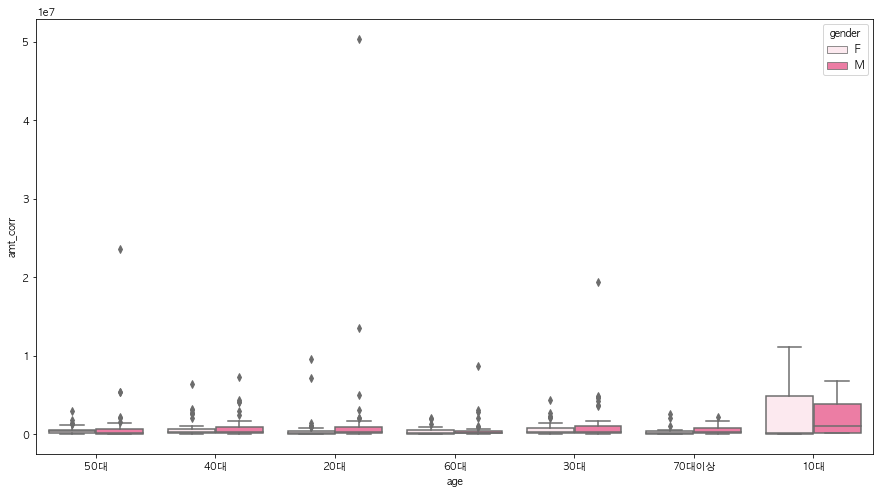

In [51]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x="age", y="amt_corr", hue="gender",color= '#ff6a9e')
plt.show()

In [52]:
print(df.query("age == '20대'")["amt_corr"].sort_values(ascending = False).index[0])
print(df.query("age == '30대'")["amt_corr"].sort_values(ascending = False).index[0])
print(df.query("age == '50대'")["amt_corr"].sort_values(ascending = False).index[0])
df = df.drop(index=[203,435,391])
df.reset_index(drop=True, inplace=True)
df

203
435
391


,upjong_cd,ym,block_cd,gender,age,amt_corr,usect_corr,class1
0,SS013,201906,14037,F,50대,48288,65,유통
1,SS013,201710,282738,F,40대,2663385,10,유통
2,SS013,202005,24909,F,20대,960730,101,유통
3,SS013,202012,358999,M,40대,566831,5,유통
4,SS013,201602,216302,M,20대,422520,10,유통
...,...,...,...,...,...,...,...,...
492,SS045,201901,410159,M,60대,330974,5,가정생활/서비스
493,SS042,201608,224910,F,70대이상,534538,10,미용
494,SS091,201601,218078,M,30대,79977,60,교육/학원
495,SS081,201902,232932,F,20대,279718,65,스포츠/문화/레저


## 1-1 연령대별 고객 분포( 카드 제작을 위한 대상 알아보기)

소비자에게 알맞는 카드를 제작하기 위해서는 고객의 소비패턴에 맞는 카드를 제작하는게 가장 중요합니다. 하지만 모든 소비자를 만족시키는 것은 불가능하기 때문에 저는 연령별, 성별을 기준으로 카드소비패턴을 분석하여 저희가 목표로하는 고객 세그먼트를 찾고자 합니다

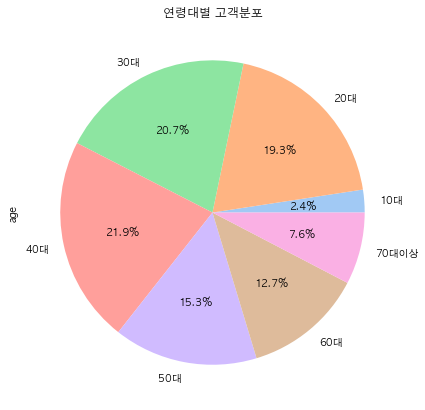

In [53]:

age_cnt=df['age'].value_counts().sort_index()
plt.title("연령대별 고객분포")
age_cnt.plot(kind = 'pie', figsize=(7,7),autopct='%1.1f%%',colors = color)
plt.show()

데이터의 총합 기준은 카드 사용량으로 측정하였습니다.

해당 파이그래프로 알 수 있는 정보는  
1.40대 30대 20대 순으로 카드를 소비한 고객량이 많았습니다.
2. 반대로 10대와 70대는 10%이하의 고객을 보여주었습니다.
 
 조금 더 세부적인 시각화를 위하여 연령별로 묶어 이용횟수와 결제 금액을 기준으로 파이차트를 만들고자 합니다.

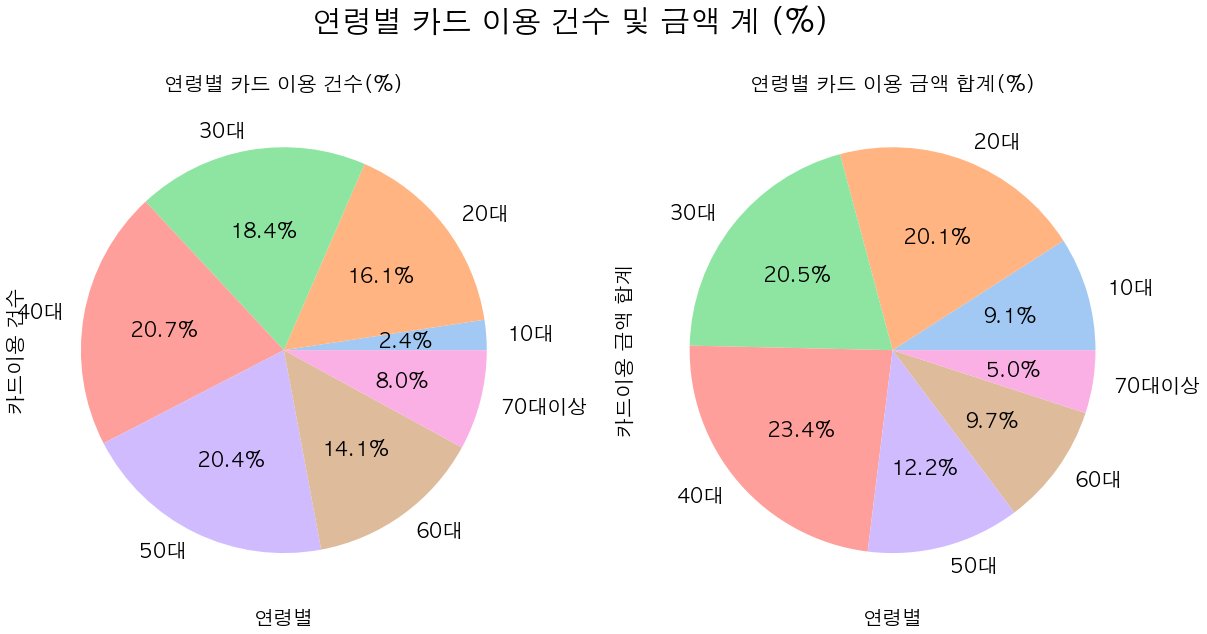

In [54]:
a = df.groupby("age")["usect_corr"].sum()
b= df.groupby("age")["amt_corr"].sum()

plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
plt.title("연령별 카드 이용 건수(%)", fontsize=20)

a.plot(kind = 'pie', autopct='%1.1f%%',textprops= {'fontsize' : 20}, colors = color)
plt.xlabel('연령별', fontsize=20)
plt.ylabel('카드이용 건수',fontsize=20)

plt.subplot(1,2,2)
plt.title("연령별 카드 이용 금액 합계(%)", fontsize=20)

b.plot(kind = 'pie', autopct='%1.1f%%',textprops= {'fontsize' : 20}, colors = color)
plt.xlabel('연령별', fontsize=20)
plt.ylabel('카드이용 금액 합계', fontsize=20)

plt.suptitle('연령별 카드 이용 건수 및 금액 계 (%)', fontsize = 30)
plt.show()

연령별 데이터를 세분화 한 결과 40대 30대 20대가 높은 고객 수를 보였지만 이용 건수와 금액 합계에 대비하여 다른 결과를 보여준다는 것을 알 수 있었습니다  
이용건수 기준에서는 40대가 가장 높은 지표인 20.7퍼센트를 보여주었고,이어 50대 30대 20대가 차지하였습니다. 이러한 지표를 보며 50대가 가장 흥미로운 지표를 보여주었는데, 고객의 수는 적지만 높은 카드 빈도수를 보여준다는 것을 알 수 있었습니다.  
반면, 가장 중요하다고 볼 수 있는 이용금액 기준에서는 23.4%라는 높은 수치를 보여주며 40대가 높은 지표를 보여주었고, 이어 30대 20대 50대가 뒤를 이었습니다.

### 해당 시각화를 통하여 알 수 있는 내용은:  
1. 50대는 상대적으로 적은 수의 고객이 존재하지만 가장 높은 카드 이용 건수를 보여주는 연령대이다.  
2. 40대는 이용 건수와 카드이용 금액에서 높은 비율을 보여주며 새로운 카드를 프로모션 한다면 40대를 위한 카드를 만들면 좋지 않을까? 라는 가설을 세우게 하였습니다.




## 연령/성별 기준 소비 패턴 분석

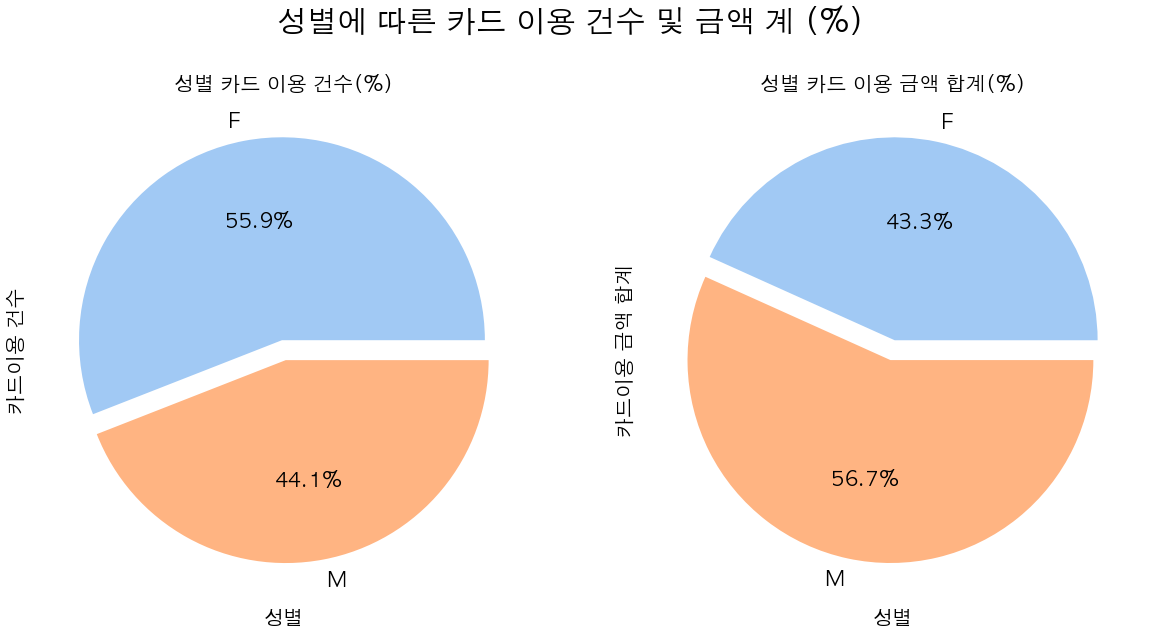

In [55]:
a = df.groupby("gender")["usect_corr"].sum()
b= df.groupby("gender")["amt_corr"].sum()

plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
plt.title("성별 카드 이용 건수(%)", fontsize=20)

a.plot(kind = 'pie',explode = [0.05, 0.05], autopct='%1.1f%%',textprops= {'fontsize' : 20},colors = color)
plt.xlabel('성별', fontsize=20)
plt.ylabel('카드이용 건수',fontsize=20)

plt.subplot(1,2,2)
plt.title("성별 카드 이용 금액 합계(%)", fontsize=20)

b.plot(kind = 'pie',explode = [0.05, 0.05], autopct='%1.1f%%',textprops= {'fontsize' : 20},colors = color)
plt.xlabel('성별', fontsize=20)
plt.ylabel('카드이용 금액 합계', fontsize=20)

plt.suptitle('성별에 따른 카드 이용 건수 및 금액 계 (%)', fontsize = 30)
plt.show()

성별을 기준으로 카드 소비 패턴 분석을 해보도록 하겠습니다.  
1. 여자들은 약 12% 정도 상대적으로 높은 카드사용 빈도를 보여주었습니다.
2. 비록 카드 사용 빈도는 적지만 남성들은 13% 정도 높은 카드 이용 금액을 보였습니다.


### 연령별 고객 성별 비중

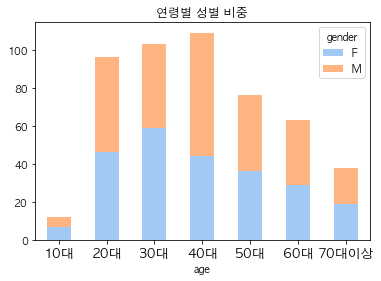

In [56]:
# 연령별 성별 비중
stacked_bar_df = df.groupby(["age","gender"]).size().unstack()
stacked_bar_df.plot(kind='bar', stacked=True, color=color)
plt.title("연령별 성별 비중")
plt.xticks(rotation=0, fontsize=13)
plt.show()

연령대별 성별 비중을 확인한 결과 대부분 비슷한 남녀 성비를 보였지만 40대에서 상대적으로 높은 여성의 비중을 보였습니다. 

### 고객 세그먼트 찾기 1차 결론

연령과 성별을 기준으로 데이터를 시각화 해본 결과 40대 30대 20대가 카드 이용 횟수, 금액 기준에서 높은 영향을 준다는 것을 알 수 있었고, 여성들이 카드를 자주 사용하지만 남성들이 더 높은 이용금액을 보여주었습니다.  
따라서 현재까지의 분석내용으로는 카드를 가장 많이 사용하고 높은 소비금액을 보여주는 고객 세그먼트는 "40대 남성" 이라는 것을 알 수 있었습니다.
하지만 더 다양한 데이터를 기반으로 결정하기 위하여 확정을 하기 보단 1차 결론으로 마무리 하도록 하겠습니다

## 고객을 위한 혜택 알아보기

업종별 카드이용 건수를 기반으로 카드 사용자들이 어떤 부분에 가장 카드를 많이 사용하는지 알아보려고 합니다.

### 업종별 카드 소비 패턴 분석

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3922b9290>,
      dtype=object)

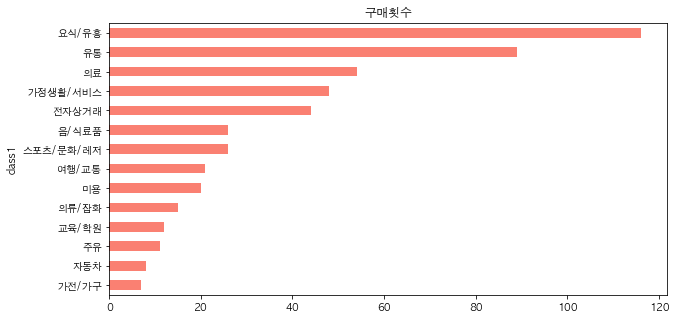

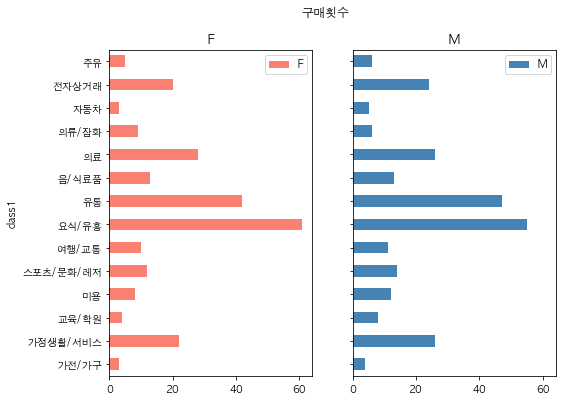

In [64]:
#구매횟수
plt.figure(figsize = (10,5))
df.groupby('class1').size().sort_values(ascending=True).plot(kind='barh',color = ['salmon'], title = "구매횟수")
#성별 구매횟수
pivot_purecnt =pd.pivot_table(df, index="class1", columns ="gender", values="usect_corr", aggfunc="size" )
pivot_purecnt.plot(kind ='barh', title = "구매횟수",sharey=True, subplots=True, layout=(1,2), figsize=(8,6), color= ['salmon','steelblue'])

해당 데이터를 확인한 결과 요식/유흥에 가장 많인 돈을 소비하였고 유통 즉 (마켓,백화점, 생활잡화...etc) 쇼핑이 두번째, 그리고 의료에 카드를 가장 자주 사용하는 것으로 나타났습니다.  
더 세부적인 분석을 위하여 성별을 나눠 분석한 결과 대체적으로 유사한 패턴의 소비패턴을 보여주었고 특이한 점은 여성들은 남성들 보다 요식에 더 자주 카드를 사용하였고 남자들은 쇼핑에 있어 여성들보다 카드를 자주 사용하는 것으로 나타났습니다.

더욱 자세한 분석을 위하여 
구매단가를 보여주는 price라는 컬럼을 데이터에 추가하였습니다.
구매 단가는 총 소비량을 사용 빈도수로 나눠 계산하였습니다.

In [66]:
df["price"]=df["amt_corr"]/df["usect_corr"]

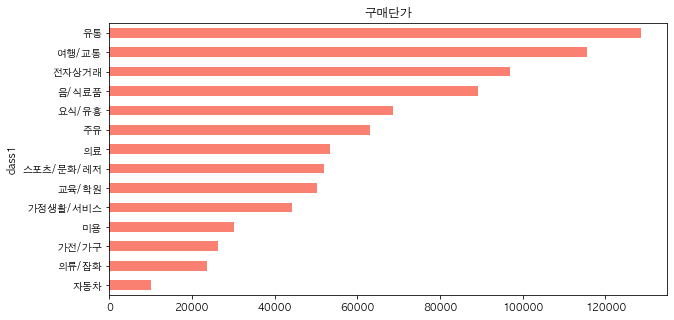

In [67]:
plt.figure(figsize = (10,5))
df.groupby('class1')['price'].mean().sort_values(ascending=True).plot(kind='barh',color = ['salmon'],title = '구매단가')

데이터를 확인한 결과 유통 즉 백화점, 생활잡화등을 포함하는 유통이 가장 높은 단가를 보여주었고 호텔, 교통, 항공들을 포함하는 여행/교통이 두번째 그리고 온라인 거래를 보여주는 전자상거래가 세번째로 구매단가가 높았습니다. 그렇다면 이러한 데이터를 기준으로 남여가 어떤 카테고리에 돈을 더 많이 지출하는지 확인해보도록 하겠습니다.

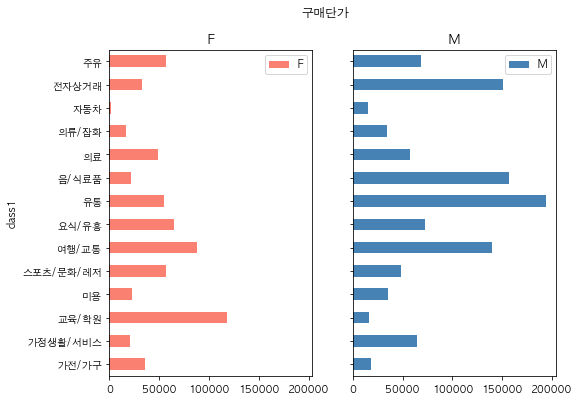

In [68]:
# 업종별 상품 평균구매단가 (어디에 돈을 더 지출하는가?)
pivot_price=pd.pivot_table(df, index="class1", columns ="gender", values="price", aggfunc="mean", fill_value=0)
pivot_price.plot(kind ='barh', title = "구매단가",sharey=True, subplots=True, layout=(1,2), figsize=(8,6),color= ['salmon','steelblue'])
plt.show()

해당 데이터를 보며, 여성들은 상대적으로 낮은 구매단가의 결제를 자주 한다는 것을 알 수 있었지만, 교육/학원 분야에서는 남성들 보다 상대적으로 높은 단가의 구매도 진행할 의사가 있는 것으로 확인되었습니다. 남성들은 전체적으로 카드 이용의 빈도수는 적지만, 거의 대부분의 분야에서 여성들보다 높은 단가의 구매에도 구매를 진행할 의사가 있는 것으로 확인되었습니다.

### 성별 평균소비금액

여성과 남성이 상대적으로 다른 부분에서 높은 지표를 보여주었기 때문에 총 거래금액을 총거래횟수로 나눠 1회 평균 소비금액을 알아보았습니다.  

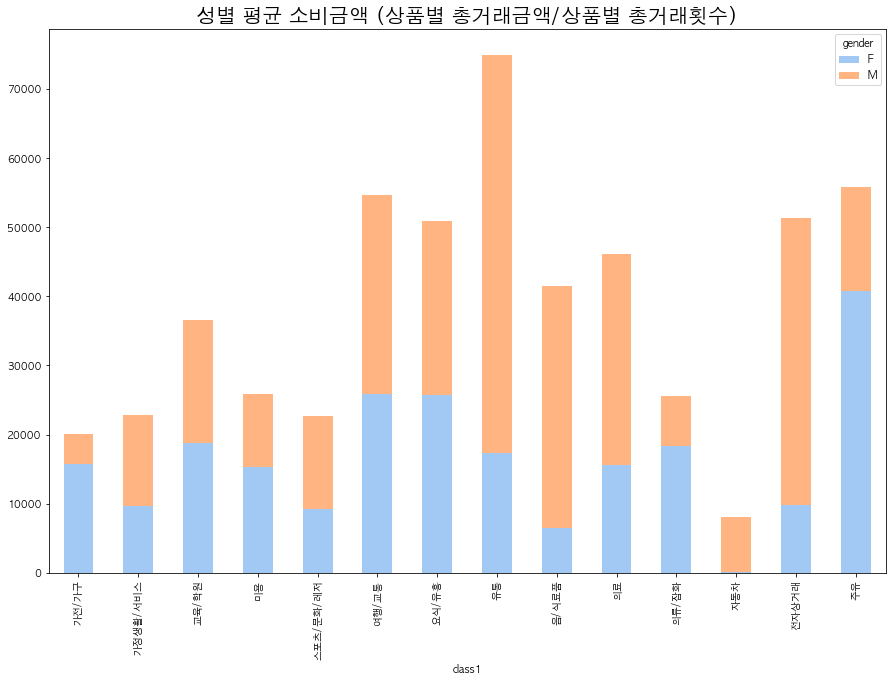

In [69]:
#평균소비금액 (총거래금액/총거래횟수)
pivot_amt=pd.pivot_table(df, index="class1", columns ="gender", values="amt_corr", aggfunc="sum", fill_value=0)
pivot_cntsum =pd.pivot_table(df, index="class1", columns ="gender", values="usect_corr", aggfunc="sum" , fill_value=0)
pivot_avg =pivot_amt/pivot_cntsum
pivot_avg.plot(kind='bar', stacked=True, color=color, figsize=(15,10))
plt.title("성별 평균 소비금액 (상품별 총거래금액/상품별 총거래횟수)", fontsize=20)
plt.show()

# 분석결과

<성별/연령대 별 고객 분포, 카드 사용 패턴>  
1. 40대,30대,20대는 이용횟수와 이용금액에서 높은 수치를 기록했습니다.  
2. 50대는 고객의 수는 작지만 40대,30대,20대에 버금가는 이용횟수를 보여주며 의외의 수치를 나타내었습니다.  
3. 여성들은 남성들에 비해 상대적으로 카드를 자주 사용하지만(약 12%)남성들이 더 높은 이용금액(약 13%)을 사용하는 것을 알 수 있었습니다.


<업종별 카드 소비 패턴 분석>
1. 요식,유통,전자상거래가 가장 높은 구매횟수를 보였습니다.
2. 남성들은 대체적으로 모든 부분에서 상대적으로 높은 구매단가를 보였지만 특히, 식료품,요식, 전자상거래 부분에서 높은 구매단가에도 구매의지를 보여주었습니다.
3. 여성들은 반대로 낮은 구매단가를 보였지만, 교육 부분에 있어서는 남성들 보다 높은 구매단가에도 구매의지를 보였습니다.

<업종별 성별 평균 소비금액>  
1.여성들은 남성보다 의류/잡화,가전,주유에 높은 소비를 보였습니다.  
2.남성들은 여성보다 자동차,전자상거래, 음/식료품에 평균적으로 높은 소비금액을 보여주었습니다.

## 어떠한 카드를 만들어야 할까?(결론)

데이터를 기반으로 분석한 결과 40대,30대,20대 남성들이 선호하는 요식, 온라인 거래, 자동차 관련 혜택에 초점을 둔 카드를 출시 한다면 남성 고객들은 높은 구매 단가 역시 구매의 의사가 있기때문에 카드 결제 빈도수에 관련된 조건을 기준으로 혜택을 제시한다면 카드사의 수익을 늘리는데 도움을 줄 것 같습니다. 

이와 반대로, 전체적으로 낮은 구매단가와 높은 빈도수의 카드사용을 하는 여성들은 전월결제액이라던지 최소 이용한도를 기반으로 혜택을 제공한다면 더 많은 유저를 모을 수 있을 것이라고 생각합니다.